# Regression

**Regression** is a type of supervised learning algorithm where the target variable is *continuous* rather than *discrete* (in case of Classification)

$ y = mx + c $ is a simple regression line for 1D feature vector

In [1]:
import os, re
import numpy as np

In [2]:
data_set_path = re.sub('Algorithm', 'Dataset/insurance.csv', os.getcwd())

In [3]:
data_set = np.loadtxt(data_set_path, delimiter=',', skiprows=1, usecols=[1,2])

In [4]:
data_set.shape

(63, 2)

In [5]:
import matplotlib.pyplot as plt

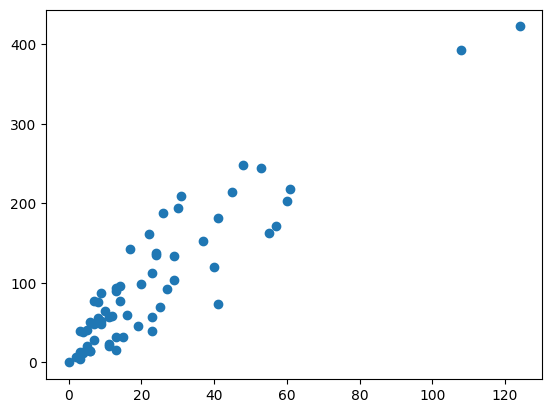

In [8]:
plt.scatter(data_set[:,0], data_set[:,1])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
data_set = StandardScaler().fit_transform(data_set)

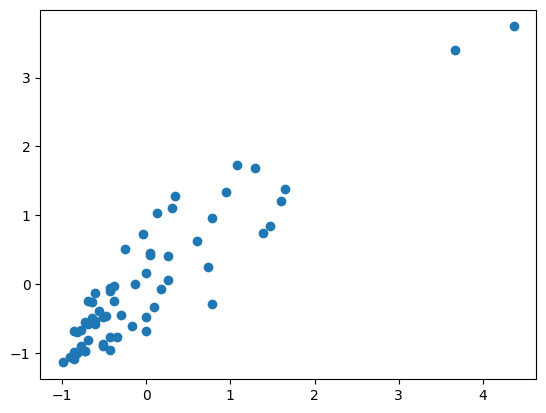

In [11]:
plt.scatter(data_set[:,0], data_set[:,1])

In [12]:
slope = 0.0
intercept = 0.0

In [13]:
def predict(x):
    return slope * x + intercept

In [14]:
predict(1)

0.0

For a given regression line, we need to optimise the slope and intercept such as it minimise the loss function and here we are going to use the *sum of sqaured residuals* as loss function

In [18]:
def loss():
    x = data_set[:,0]
    y = data_set[:,1]
    n = x.size
    
    loss = 0
    for xi,yi in zip(x,y):
        loss += (predict(xi) - yi) ** 2
    return loss / n

In [19]:
loss()

1.0000000000000002

Now, to minimise the loss function we are going to use **Batch Gradient Descent**

In [30]:
def step_slope():
    x = data_set[:,0]
    y = data_set[:,1]
    n = x.size
    
    step = 0
    for xi,yi in zip(x,y):
        step += 2 * (slope * xi + intercept - yi) * xi
    return step / n

In [31]:
def step_intercept():
    x = data_set[:,0]
    y = data_set[:,1]
    n = x.size
    
    step = 0
    for xi,yi in zip(x,y):
        step += 2 * (slope * xi + intercept - yi)
    return step / n

In [32]:
slope = slope - 0.01 * step_slope()
intercept = intercept - 0.01 * step_intercept()

In [33]:
loss()

0.9669994717896141

Now, we iterate multiple step of gradient descent until the step value becomes less than 1e-6

In [34]:
for _ in range(1000):
    step_value_slope = step_slope()
    step_value_intercept = step_intercept()
    
    if abs(step_value_slope)<1e-6 and abs(step_value_intercept)<1e-6:
        break
    
    slope = slope - 0.01 * step_value_slope
    intercept = intercept - 0.01 * step_value_intercept
else:
    print("Maximum Iteration Count Hit")

In [35]:
loss()

0.16665332802079633

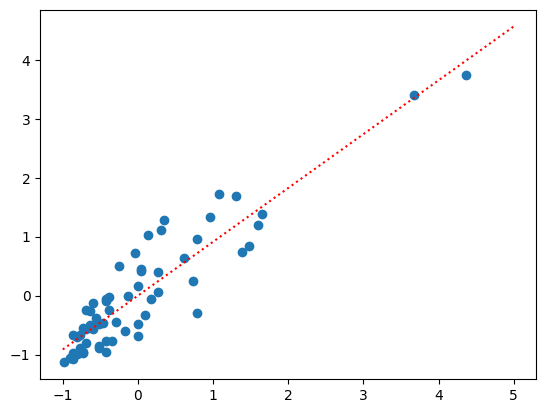

In [37]:
plt.scatter(data_set[:,0], data_set[:,1])
plt.plot(range(-1,6), [predict(x) for x in range(-1,6)], 'r:')